# General Instructions to students:

1. There are 4 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages, unless needed.

4. The code is to be written in Python 3.x syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/printed.

6. If TextWrite cells ask you to give accuracy/error/other numbers, you can print them on the code cells, but remove the print statements before submitting.

7. Any runtime failures on the submitted notebook will get zero marks.

8. All code must be written by you. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

10. All plots must be labelled properly, the labels/legends should be readable, all tables must have rows and columns named properly.

11. Change the name of file with your roll no. For example cs15d203.ipynb (for notebook) and cs15d203.py (for plain python script)





In [2]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures


**Cell type : TextRead**

4b) Write a code to do polynomial regression with quadratic regularization that takes degree d and regularization parameter λ as input.

You could refer to the linear regression code discussed in [Tutorial 8](https://colab.research.google.com/drive/1kQd5F0dDFFRnyduG5uB7UWHtyFQJjMHq?usp=sharing#scrollTo=dqri9wcqb-k7).

In [3]:
# Cell type : CodeWrite
# write the function for Polynomial regression with quadratic regularization here.


def polyregression(Data, lambda_l, degree):
    """ Build the regression model 

    Arguments:
    Data: Dataset
    Lambda: regularization parameter
    Degree: Degree of the polynomial

    output: weights
    """
    trans = PolynomialFeatures(degree=degree)
    train_x, train_y = Data
    train_x = trans.fit_transform(train_x)

    weights = np.linalg.pinv(np.transpose(
        train_x) @ train_x + lambda_l*np.eye(train_x.shape[1])) @ (np.transpose(train_x)) @ train_y

    return weights


dataset = np.loadtxt("bayes_variance_data.csv",
                     delimiter=",", dtype=str)
train_x = np.array(list(map(float, dataset[1:, 0]))).reshape(-1, 1)
train_y = np.array(list(map(float, dataset[1:, 1]))).reshape(-1, 1)

l = 10
weights = polyregression((train_x, train_y), l, 24)
print('weights for lambda:', l, '=', weights)

weights for lambda: 10 = [[ 3.34483614]
 [-1.00583293]
 [-0.80072489]
 [-0.51352148]
 [-0.32221941]
 [-0.20028601]
 [-0.12145228]
 [-0.06938851]
 [-0.03433095]
 [-0.01035931]
 [ 0.00620289]
 [ 0.017698  ]
 [ 0.02565687]
 [ 0.03110482]
 [ 0.03474469]
 [ 0.03706847]
 [ 0.03842717]
 [ 0.03907525]
 [ 0.03919981]
 [ 0.03893988]
 [ 0.03839977]
 [ 0.03765819]
 [ 0.03677484]
 [ 0.03579508]
 [ 0.0347534 ]]


4c) Run the code for degree $d=24$ and each $\lambda$ in the set:
\[\{10^{-15}, 10^{-9}, 10^{-6}, 10^{-3}, 10^{-2}, 10^{-1}, 1, 10^{1}, 10^{2}, 10^{3}, 10^{6}, 10^{9}, 10^{15}\}\]

  i) Perform 5-fold cross-validation on the 100 data points (20 datapoints in each fold). For each fold, compute both training and validation errors using the mean squared error loss function. \\
  ii) Calculate the average training and validation errors across the 5 folds.

In [4]:
def KFold_Poly(Data):
    """ Split data for training and testing. Then train the model """
    """ Use the trained model to make predictions for test data """
    """
    Arguments: Dataset

    output: Training_score, Validation_score
    """
    train_x, train_y = Data

    def mse(x, y):
        return np.square(np.subtract(x, y)).mean()

    degree = 24
    k_fold = 5
    fold_size = len(train_x) // 5
    indices = np.arange(len(train_x))
    folds = []
    for i in range(k_fold):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate(
            [indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))

    trans = PolynomialFeatures(degree=degree)

    lambda_l = np.array([1/np.power(10, 15), 1/np.power(10, 9), 1/np.power(10, 6), 1/np.power(10, 3), 1/np.power(10, 2), 1/np.power(10, 1),
                         np.power(10, 0), np.power(10, 1), np.power(10, 2), np.power(10, 3), np.power(10, 6), np.power(10, 9), np.power(10, 15)])
    results = {}
    for l in lambda_l:
        results[l] = {}
        for ind, (train_indices, test_indices) in enumerate(folds):
            x_train = train_x[train_indices]
            y_train = train_y[train_indices]

            x_test = train_x[test_indices]
            y_test = train_y[test_indices]
            weights = polyregression((x_train, y_train), l, degree=degree)
            train_error = mse(trans.fit_transform(x_train)@weights, y_train)
            test_error = mse(trans.transform(x_test)@weights, y_test)
            results[l][ind+1] = {'train_error': train_error,
                                 'test_error': test_error}

    return results

    # return Training_score, Validation_score
KFold_Poly((train_x, train_y))

{1e-15: {1: {'train_error': 0.942325825254423,
   'test_error': 1.4177646053442161},
  2: {'train_error': 0.7384864119666855, 'test_error': 2.0403738855431817},
  3: {'train_error': 0.9165912322732044, 'test_error': 5.4660539987209384},
  4: {'train_error': 0.8820191810046797, 'test_error': 1.3190853884989509},
  5: {'train_error': 0.9521553780137939, 'test_error': 0.9550130392740291}},
 1e-09: {1: {'train_error': 0.9440345751372916,
   'test_error': 1.2925948012353714},
  2: {'train_error': 0.7697626087147613, 'test_error': 1.8641051645374707},
  3: {'train_error': 0.9604413617682128, 'test_error': 2.049461974154174},
  4: {'train_error': 0.8942166999213192, 'test_error': 1.2456266006453907},
  5: {'train_error': 0.9562400154168256, 'test_error': 0.9300675783006428}},
 1e-06: {1: {'train_error': 0.9451324504656492,
   'test_error': 1.2900246610266006},
  2: {'train_error': 0.8119337733732213, 'test_error': 1.6779694445756008},
  3: {'train_error': 0.9911469975372466, 'test_error': 1.0

4d)  Construct a learning curve by plotting the average training and validation errors against the model complexity ($\log_{10} \lambda$). Based on this learning curve, identify the (i) model with the highest bias, (ii) model with the highest variance?, and (iii) the model that will work best on some unseen data.

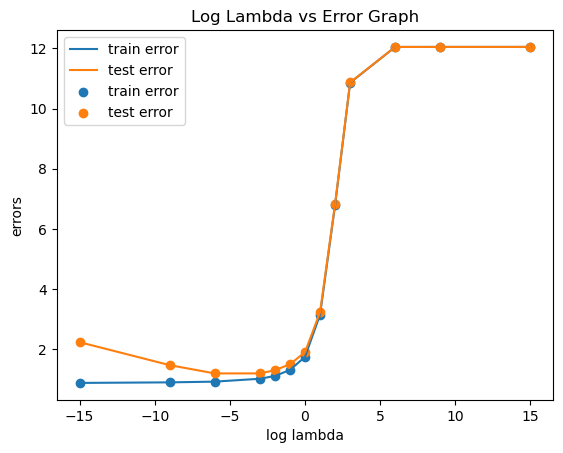

The model with high bias is lambda: 1000000000000000.0
The model with high variance is lambda: 1e-15
The model with best Lambda: 1e-06


In [6]:
# Cell type : CodeWrite
# Write the cod for plotting.

result = KFold_Poly((train_x, train_y))
lambda_l = list(result.keys())
train_errors = []
test_errors = []

for l in lambda_l:
    folds = result[l].keys()
    temp_res_train = []
    temp_res_test = []
    for fold in folds:
        temp_res_train.append(result[l][fold]['train_error'])
        temp_res_test.append(result[l][fold]['test_error'])
    res_train = np.mean(temp_res_train)
    res_test = np.mean(temp_res_test)
    train_errors.append(res_train)
    test_errors.append(res_test)

plt.plot(np.log10(lambda_l), train_errors, label='train error')
plt.plot(np.log10(lambda_l), test_errors, label='test error')
plt.scatter(np.log10(lambda_l), train_errors, label='train error')
plt.scatter(np.log10(lambda_l), test_errors, label='test error')
plt.legend()
plt.ylabel('errors')
plt.xlabel('log lambda')
plt.title('Log Lambda vs Error Graph')
plt.show()

best_model = np.argmin(test_errors)


print('The model with high bias is lambda:', lambda_l[12])
print('The model with high variance is lambda:',  lambda_l[0])
print('The model with best Lambda:', lambda_l[best_model])

4e) Plot the fitted curve to the given data ($\hat{y}$ against $x$) for the three models reported in part (e).

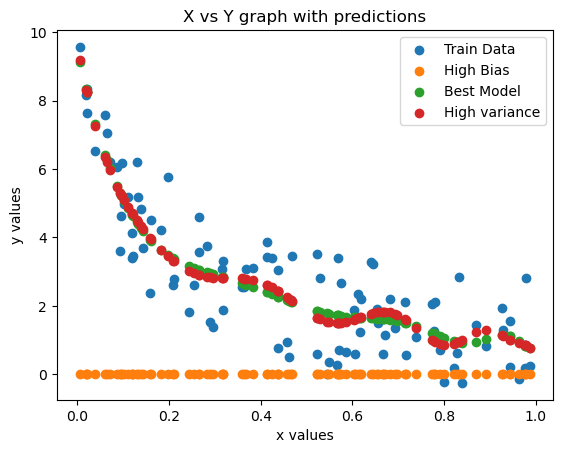

In [14]:
# Cell type : CodeWrite
# Write the cod for plotting.
lambda_high_bias = lambda_l[12]
lambda_best = lambda_l[best_model]
lambda_high_variance = lambda_l[0]

weights_high_bias = polyregression((train_x, train_y), lambda_high_bias, 24)
weights_best = polyregression((train_x, train_y), lambda_best, 24)
weights_high_variance = polyregression(
    (train_x, train_y), lambda_high_variance, 24)
trans = PolynomialFeatures(degree=24)
train_x_new = trans.fit_transform(train_x)

y_pred_high_bias = train_x_new@weights_high_bias
y_pred_best = train_x_new@weights_best
y_pred_high_variance = train_x_new@weights_high_variance

plt.scatter(train_x, train_y, label='Train Data')
plt.scatter(train_x, y_pred_high_bias, label='High Bias')
plt.scatter(train_x, y_pred_best, label='Best Model')
plt.scatter(train_x, y_pred_high_variance, label='High variance')
plt.legend()
plt.title('X vs Y graph with predictions')
plt.xlabel('x values')
plt.ylabel('y values')

plt.show()